In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import itertools 
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf
import tensorflow.keras as K

from keras.models import *
import tensorflow as tf
from tensorflow.keras import Model
import gc
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#
path = '/content/drive/MyDrive/EEG_DL/NMED_T/Xy_psd/'

X_train = np.load(path + "x_traing3.npy")


X_test = np.load(path + "x_testg3.npy")



y_train = np.load(path + "y_train2.npy")


y_test = np.load(path + "y_test2.npy")

print("X",X_train.shape,X_test.shape)

print("y",y_train.shape,y_test.shape)

X (36000, 125, 125, 3) (12000, 125, 125, 3)
y (36000, 10) (12000, 10)


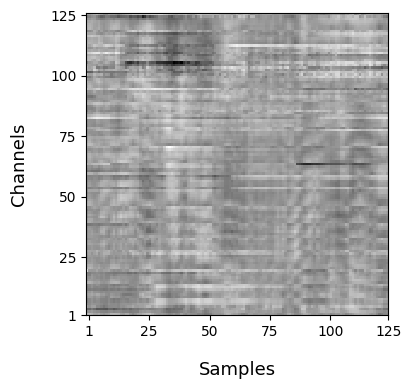

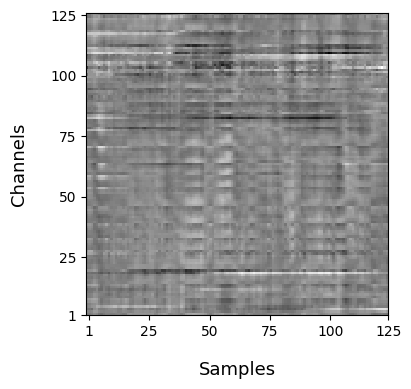

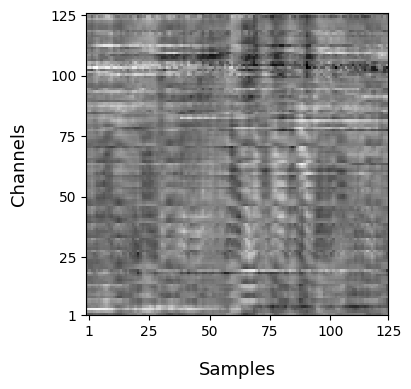

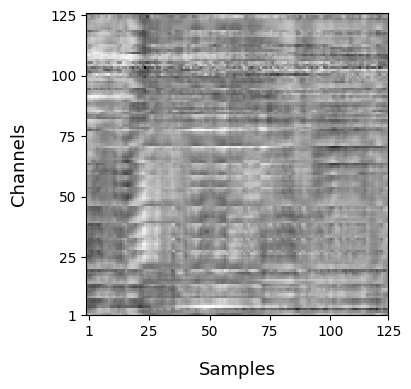

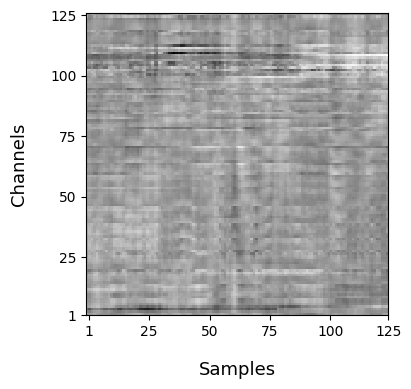

In [15]:
#visualizing data

font = {'family': 'Verdana', 
        'color':  'black', 
        'size': 13, 
        } 

for i in range(5):
  example = X_train[10+i,:,:,0]
  plt.figure(dpi=100)

  plt.yticks([0.5,25.5,50.5,75.5,100.5,124.5],['125','100','75','50','25','1'])
  plt.xticks([0.5,25.5,50.5,75.5,100.5,124.5],['1','25','50','75','100','125'])
  image = plt.imshow(example.T, cmap='Greys', interpolation='nearest')
  plt.ylabel('Channels', fontdict=font, labelpad=16)
  plt.xlabel('Samples', fontdict=font, labelpad=16)

In [3]:
!pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-q4su8r2u
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-q4su8r2u
  Running command git submodule update --init --recursive -q


In [4]:
from classification_models.tfkeras import Classifiers
Classifiers.models_names()

['resnet18',
 'resnet34',
 'resnet50',
 'resnet101',
 'resnet152',
 'seresnet18',
 'seresnet34',
 'seresnet50',
 'seresnet101',
 'seresnet152',
 'seresnext50',
 'seresnext101',
 'senet154',
 'resnet50v2',
 'resnet101v2',
 'resnet152v2',
 'resnext50',
 'resnext101',
 'vgg16',
 'vgg19',
 'densenet121',
 'densenet169',
 'densenet201',
 'inceptionresnetv2',
 'inceptionv3',
 'xception',
 'nasnetlarge',
 'nasnetmobile',
 'mobilenet',
 'mobilenetv2']

In [5]:
from classification_models.tfkeras import Classifiers

resnet, preprocess_input = Classifiers.get('resnet50')
res50 = resnet(input_shape=(125, 125, 3), weights='imagenet',include_top=True)

res50.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, 125, 125, 3  0           []                               
                                )]                                                                
                                                                                                  
 bn_data (BatchNormalization)   (None, 125, 125, 3)  9           ['data[0][0]']                   
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 131, 131, 3)  0          ['bn_data[0][0]']                
                                                                                                  
 conv0 (Conv2D)                 (None, 63, 63, 64)   9408        ['zero_padding2d[0][0]']     

In [6]:
x = res50.layers[-3].output
o = layers.Dense(10, activation='softmax')(x)

model = Model(res50.input, [o])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, 125, 125, 3  0           []                               
                                )]                                                                
                                                                                                  
 bn_data (BatchNormalization)   (None, 125, 125, 3)  9           ['data[0][0]']                   
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 131, 131, 3)  0          ['bn_data[0][0]']                
                                                                                                  
 conv0 (Conv2D)                 (None, 63, 63, 64)   9408        ['zero_padding2d[0][0]']   

In [7]:
opt = keras.optimizers.Adam(learning_rate=0.008)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['categorical_accuracy'])
history = model.fit(X_train,y_train,epochs=125,batch_size=100,validation_data=(X_test,y_test))

Epoch 1/125
360/360 [==============================] - 59s 143ms/step - loss: 2.4058 - categorical_accuracy: 0.1024 - val_loss: 2.3285 - val_categorical_accuracy: 0.1086
Epoch 2/125
360/360 [==============================] - 49s 135ms/step - loss: 2.3033 - categorical_accuracy: 0.1096 - val_loss: 2.3064 - val_categorical_accuracy: 0.1085
Epoch 3/125
360/360 [==============================] - 49s 135ms/step - loss: 2.2889 - categorical_accuracy: 0.1254 - val_loss: 9.3205 - val_categorical_accuracy: 0.1050
Epoch 4/125
360/360 [==============================] - 49s 135ms/step - loss: 2.1292 - categorical_accuracy: 0.2067 - val_loss: 5.8673 - val_categorical_accuracy: 0.1513
Epoch 5/125
360/360 [==============================] - 49s 135ms/step - loss: 1.2690 - categorical_accuracy: 0.5457 - val_loss: 2.3884 - val_categorical_accuracy: 0.3979
Epoch 6/125
360/360 [==============================] - 49s 135ms/step - loss: 0.6776 - categorical_accuracy: 0.7579 - val_loss: 0.9988 - val_categoric

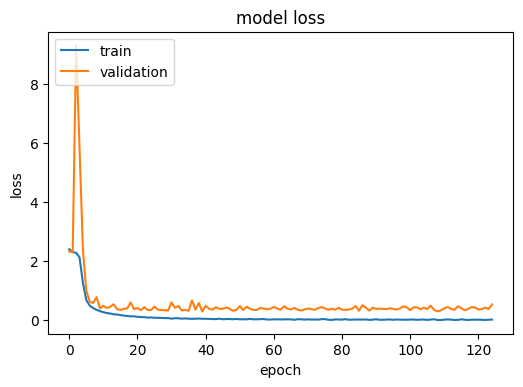

In [16]:
# summarize history for loss
plt.figure(dpi=100)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()